# Working with feature geometries

Feature geometry can be accessed using the `geometry` property of each feature, for example:

In [1]:
import fiona

with fiona.open("data/protected_areas.gpkg") as pa:
    print(pa[50]["geometry"])

## Using Shapely for geometry maninpulation   

[Shapely](http://toblerity.org/shapely/manual.html) is a Python package for set-theoretic analysis and manipulation of planar features using (via Python’s ctypes module) functions from the well known and widely deployed GEOS library. GEOS, a port of the Java Topology Suite (JTS), is the geometry engine of the PostGIS spatial extension for the PostgreSQL RDBMS. The designs of JTS and GEOS are largely guided by the Open Geospatial Consortium‘s Simple Features Access Specification and Shapely adheres mainly to the same set of standard classes and operations. Shapely is thereby deeply rooted in the conventions of the geographic information systems (GIS) world, but aspires to be equally useful to programmers working on non-conventional problems.

With Shapely, we can solve tasks like

* How big is the feature
* Do two features overlap?
* How does the common area of two features look like
* Create a buffer area around the feature
* ...

## Converting JSON to geometry objects

First we import `shapely` and it's functions and then convert the JSON-encoded geometries to Geometry objects

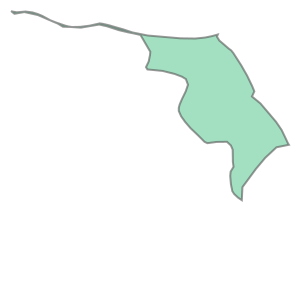

In [2]:
from shapely.geometry import shape

with fiona.open("data/protected_areas.gpkg") as pa:
    geom = shape(pa[54]["geometry"])
geom # Jupyter can display geometry data directly

In [3]:
print(geom.type)

Polygon


C:\Users\xyt556\AppData\Local\Temp\2\ipykernel_28732\4154753343.py:1: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  print(geom.type)


In [4]:
print(geom.area)

177467.44393019498


In [5]:
print(geom.length)

3377.681365863264


Let's have a look at some geometry methods

In [6]:
help(geom)

Help on Polygon in module shapely.geometry.polygon object:

class Polygon(shapely.geometry.base.BaseGeometry)
 |  Polygon(shell=None, holes=None)
 |  
 |  A geometry type representing an area that is enclosed by a linear ring.
 |  
 |  A polygon is a two-dimensional feature and has a non-zero area. It may
 |  have one or more negative-space "holes" which are also bounded by linear
 |  rings. If any rings cross each other, the feature is invalid and
 |  operations on it may fail.
 |  
 |  Parameters
 |  ----------
 |  shell : sequence
 |      A sequence of (x, y [,z]) numeric coordinate pairs or triples, or
 |      an array-like with shape (N, 2) or (N, 3).
 |      Also can be a sequence of Point objects.
 |  holes : sequence
 |      A sequence of objects which satisfy the same requirements as the
 |      shell parameters above
 |  
 |  Attributes
 |  ----------
 |  exterior : LinearRing
 |      The ring which bounds the positive space of the polygon.
 |  interiors : sequence
 |      A 

For example we can make a buffer around our polygon:

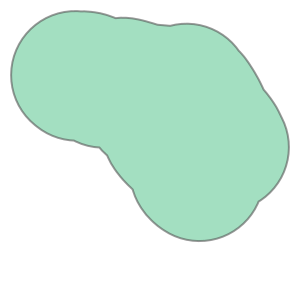

In [7]:
geom.buffer(500)

## Converting the geometry back to JSON format

Once we are finished, we can convert the geometry back to JSON format using `shapely.geometry.mapping` function

In [8]:
from shapely.geometry import mapping

In [9]:
# let's create new GeoJSON-encoded vector feature
import copy

new_feature = {
    "type": "Feature",
    "properties": {"name": "My buffered feature"},
    "geometry": mapping(geom.buffer(100))
}
new_feature

{'type': 'Feature',
 'properties': {'name': 'My buffered feature'},
 'geometry': {'type': 'Polygon',
  'coordinates': (((4735531.244035573, 3078887.974012111),
    (4735523.809702216, 3078894.605262187),
    (4735517.072048652, 3078901.94330106),
    (4735511.097941236, 3078909.9153039837),
    (4735505.946668676, 3078918.4421545775),
    (4735501.669353638, 3078927.4392299973),
    (4735498.30844539, 3078936.817240756),
    (4735495.897298524, 3078946.483116858),
    (4735494.459841933, 3078956.3409314533),
    (4735494.010341338, 3078966.292852838),
    (4735494.553257708, 3078976.2401153687),
    (4735496.08320299, 3078986.0839996366),
    (4735498.5849935785, 3078995.726812187),
    (4735502.033801008, 3079005.0728550586),
    (4735506.3953983495, 3079014.029375514),
    (4735511.626499895, 3079022.5074865455),
    (4735517.675190734, 3079030.423049013),
    (4735524.481441969, 3079037.697506667),
    (4735531.977706465, 3079044.2586657605),
    (4735540.089589202, 3079050.04141151

---
[<- Reading vector features](03_reading_vector_features.ipynb) | [Highway over protected areas ->](05_highway_over_protected_areas.ipynb)